## 3層NNのGD学習

GRADIENT DESCENT PROVABLY OPTIMIZES OVER-PARAMETERIZED NEURAL NETWORKS, Du et al. ICLR2019
に基づく。

目標はランダム二次形式
$$ 
g(x) = x' G x
$$
($G$はランダム行列）を学習する場合を確認することである。

訓練データは$S_d$ ($S_d$は$d$次元単位超球を意味する)上の点$x_1, x_2, \ldots, x_n$である。
対応する学習ラベルは$g(x_1), g(x_2), \ldots, g(x_n)$である。


Copyright (c) 2022 Tadashi Wadayama  
Released under the MIT license  
https://opensource.org/licenses/mit-license.php

In [17]:
using LinearAlgebra
using Plots
gr()
using Flux
using Random
Random.seed!(1)

TaskLocalRNG()

## 基本パラメータの定義

In [18]:
m = 100; 
a = randn(m); 
n = 50; 
d = 10; 

## 訓練データの作成

In [19]:
G = randn(d,d)
X = zeros(d, n)
Y = zeros(n)

for j in 1:n
    x = randn(d)
    x = x/norm(x)
    y = x'*G*x
    X[:,j] = x
    Y[j] = y
end

## ニューラルネットワークの定義

In [20]:
f(W, x) = sum(a.*relu.(W' * x), dims=1)'/sqrt(m)

f (generic function with 1 method)

### NN学習のための損失関数の定義

In [21]:
function L(W) 
    return 0.5*norm(f(W, X) - Y)^2
end

L (generic function with 1 method)

## 勾配法

In [22]:
function GD(max_itr, η)
    W = randn(d, m)
    ret_list = zeros(max_itr)
    for i in 1:max_itr
        gs = Flux.gradient(Flux.params(W)) do
            L(W)
        end
        W = W - η*gs[W]
        ret_list[i] = L(W)
    end
    return ret_list
end

GD (generic function with 1 method)

## 勾配法の実行

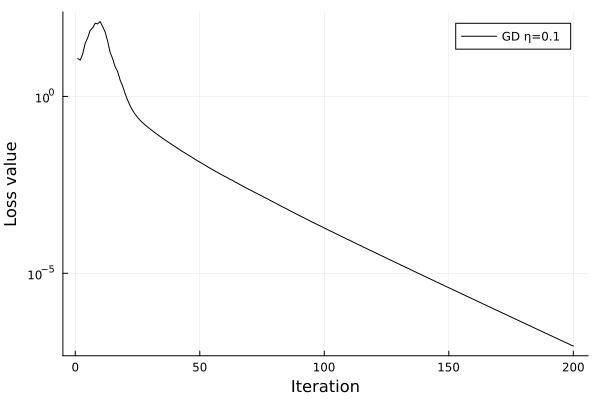

In [23]:
η = 1.1
max_itr = 200
L_list = GD(max_itr, η);
plot(1:max_itr, L_list, lw=1,yscale=:log10, label="GD η=0.1", xlabel="Iteration", ylabel="Loss value", color=:black)

In [24]:
savefig("NN-fullbatch.pdf")